In [3]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout



In [63]:
# Chargement des jeux de données
data_train = pd.read_csv("/Users/benothmane/Desktop/Projet IA/train.csv") # chemin du dataset
data_test=pd.read_csv(r"/Users/benothmane/Desktop/Projet IA/test.csv")


In [74]:
data_train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [75]:
data_test

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [92]:
#ajout d'une colonne "total" pour  afficher les mots clés data_test=data_test.fillna(' ')
data_train=data_train.fillna(' ')
data_test['total']=data_test['title']+' '+data_test['author']+data_test['text']
data_train['total']=data_train['title']+' '+data_train['author']+data_train['text']

In [93]:
data_train

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [94]:
data_test

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...
...,...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,The Bangladeshi Traffic Jam That Never Ends - ...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,John Kasich Signs One Abortion Bill in Ohio bu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,"California Today: What, Exactly, Is in Your Su..."
5198,25998,300 US Marines To Be Deployed To Russian Borde...,,« Previous - Next » 300 US Marines To Be Deplo...,300 US Marines To Be Deployed To Russian Borde...


In [112]:
#Separation des données en ensembles d'entraînement et de test
train_texts, test_texts, train_labels, test_labels = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [67]:
# Remplacement  des valeurs Non définies  par une chaîne vide
train_texts.fillna('', inplace=True)
test_texts.fillna('', inplace=True)


In [68]:
# Création  et entraînement du   modèle TF-IDF avec une régression logistique pour la détection de fake news
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_train = tfidf_vectorizer.fit_transform(train_texts)
tfidf_test = tfidf_vectorizer.transform(test_texts)


In [69]:
# Entraînement du  modèle de régression logistique
logistic_model = LogisticRegression()
logistic_model.fit(tfidf_train, train_labels)


LogisticRegression()

In [113]:
# Mise en place des  prédictions
tfidf_predictions = logistic_model.predict(tfidf_test)

In [114]:
# Évaluation du   modèle TF-IDF
print("TF-IDF Accuracy:", accuracy_score(test_labels, tfidf_predictions))
print("TF-IDF Classification Report:")
print(classification_report(test_labels, tfidf_predictions))


TF-IDF Accuracy: 0.9485576923076923
TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2132
           1       0.94      0.95      0.95      2028

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



In [49]:
# Prétraitement des textes pour le modèle LSTM
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)
train_padded = pad_sequences(train_sequences, maxlen=max_len)
test_padded = pad_sequences(test_sequences, maxlen=max_len)


In [103]:
# Construction du modèle LSTM
lstm_model = Sequential([
    Embedding(max_words, 64),  # Retirer input_length d'ici
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(train_padded, train_labels, epochs=5, batch_size=32, validation_data=(test_padded, test_labels))

Epoch 1/5
520/520 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.8018 - loss: 0.4095 - val_accuracy: 0.9260 - val_loss: 0.1956
Epoch 2/5
520/520 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9657 - loss: 0.1052 - val_accuracy: 0.9178 - val_loss: 0.2234
Epoch 3/5
520/520 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9794 - loss: 0.0620 - val_accuracy: 0.9291 - val_loss: 0.2660
Epoch 4/5
520/520 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9911 - loss: 0.0298 - val_accuracy: 0.9202 - val_loss: 0.2737
Epoch 5/5
520/520 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9947 - loss: 0.0162 - val_accuracy: 0.9168 - val_loss: 0.4048


In [107]:

# Affichage des fausses nouvelles
print("\nFake News:")
print(df[df['label'] == 0]['text'].values)


Fake News:
['Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCa

In [108]:
# Affichage  les vraies nouvelles
print("True News:")
print(df[df['label'] == 1]['text'].values)


True News:
['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was re

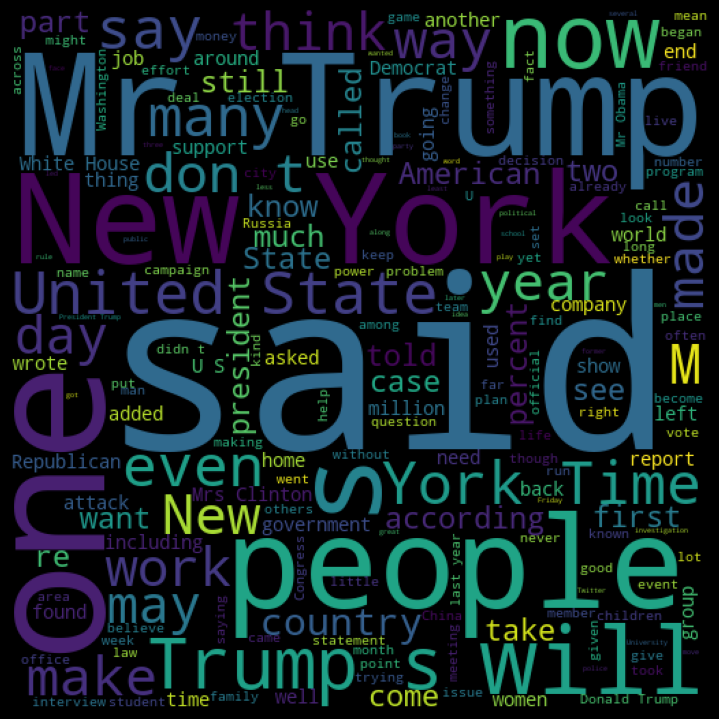

In [106]:

#Affichage du  nuage de mots pour le vraies nouvelles 
real=' '.join(list(data_train[train['label']==0]['total']))
real=WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

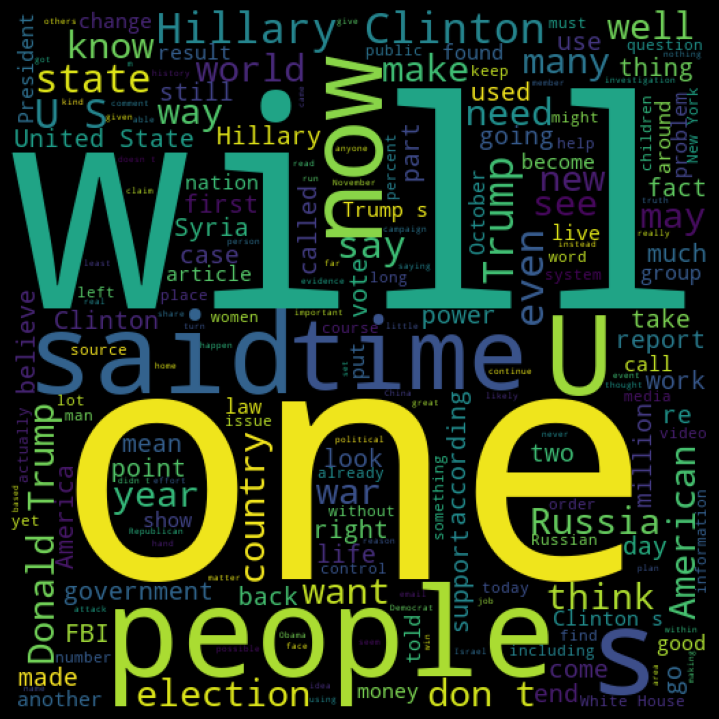

In [109]:

#Affichage du  nuage de mots pour le fausses  nouvelles 
fake=' '.join(list(train[train['label']==1]['total']))
fake=WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [25]:
# Évaluation du  modèle LSTM
lstm_loss, lstm_accuracy = lstm_model.evaluate(test_padded, test_labels)
print("LSTM Accuracy:", lstm_accuracy)

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9162 - loss: 0.4014
LSTM Accuracy: 0.9196062088012695
